In [142]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

The whole goal of this project is to predict the days where the S&P500 will increase in value to execute a trade. The target is 0(indicating that the S&P did not increase in value on that day) or 1(indicating that the S&P did increase in value)

# Data Preprocessing

In [143]:
"""Get the s&p 500 info"""
sp500 = yf.Ticker("^GSPC")
sp500 = sp500.history(period = "10y")
sp500 = sp500.drop(['Dividends', 'Stock Splits'], axis = 1)
sp500 = sp500.loc["2015-01-01":].copy()
sp500

,Open,High,Low,Close,Volume
Date,,,,,
2015-01-02 00:00:00-05:00,2058.899902,2072.360107,2046.040039,2058.199951,2708700000
2015-01-05 00:00:00-05:00,2054.439941,2054.439941,2017.339966,2020.579956,3799120000
2015-01-06 00:00:00-05:00,2022.150024,2030.250000,1992.439941,2002.609985,4460110000
2015-01-07 00:00:00-05:00,2005.550049,2029.609985,2005.550049,2025.900024,3805480000
2015-01-08 00:00:00-05:00,2030.609985,2064.080078,2030.609985,2062.139893,3934010000
...,...,...,...,...,...
2024-12-18 00:00:00-05:00,6047.649902,6070.669922,5867.790039,5872.160156,5246960000
2024-12-19 00:00:00-05:00,5912.709961,5935.520020,5866.069824,5867.080078,4896880000
2024-12-20 00:00:00-05:00,5842.000000,5982.060059,5832.299805,5930.850098,8223220000


<Axes: xlabel='Date'>

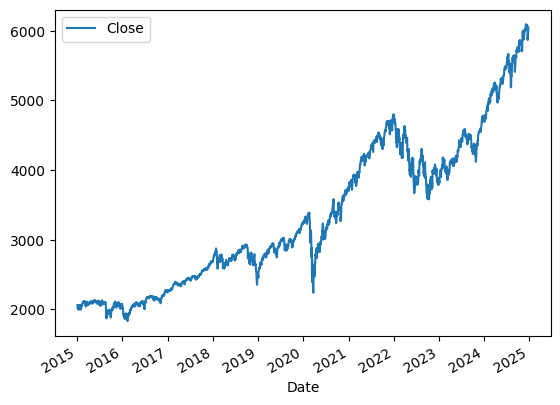

In [144]:
sp500.plot.line(y = "Close", use_index = True)

# Interest rate data

I used data from https://fred.stlouisfed.org/series/DFF to gather interest rate data from January 1 2015 until December 4 2024

Big Idea: The idea is that the preceeding week before rates go up (often prior a fed announcement), there will be mass speculation on the direction of the interest rate. Which will drive the price up.

In [145]:
interest_rate_data = pd.read_csv('DFF.csv')
#IR_data will be the dataframe used to refer to the interest rate data
IR_data = interest_rate_data.copy()
IR_data = interest_rate_data.set_index('DATE')
IR_data

,DFF
DATE,
2015-01-01,0.06
2015-01-02,0.12
2015-01-03,0.12
2015-01-04,0.12
2015-01-05,0.12
...,...
2024-11-30,4.58
2024-12-01,4.58
2024-12-02,4.58


/var/folders/5r/1lsvb2gx50n91j4gfq7gvff80000gn/T/ipykernel_2852/4038687047.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


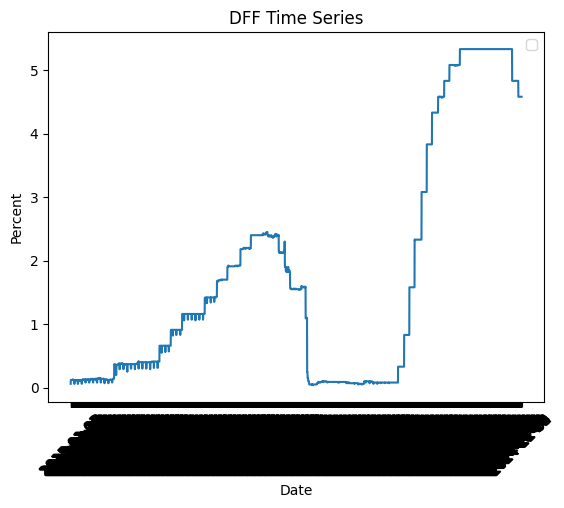

In [146]:
plt.plot(IR_data.index, IR_data['DFF'])
plt.xlabel('Date')
plt.ylabel('Percent')
plt.title('DFF Time Series')
plt.legend()

plt.xticks(rotation=45)

# Show the plot
plt.show()

In [147]:
"""Tommorrow reflects the starting price the next day"""
sp500['Tomorrow'] = sp500['Close'].shift(-1)

"""Target reflects whether or not the S&P went up the next day"""
sp500['Target'] = (sp500['Tomorrow'] > sp500['Close']).astype(int)

"""Drop the time to match with IR_data"""
sp500 = sp500.reset_index()
sp500['Date'] = sp500['Date'].astype(str)
sp500['Date'] = sp500['Date'].str.split(" ").str[0]
sp500

,Date,Open,High,Low,Close,Volume,Tomorrow,Target
0,2015-01-02,2058.899902,2072.360107,2046.040039,2058.199951,2708700000,2020.579956,0
1,2015-01-05,2054.439941,2054.439941,2017.339966,2020.579956,3799120000,2002.609985,0
2,2015-01-06,2022.150024,2030.250000,1992.439941,2002.609985,4460110000,2025.900024,1
3,2015-01-07,2005.550049,2029.609985,2005.550049,2025.900024,3805480000,2062.139893,1
4,2015-01-08,2030.609985,2064.080078,2030.609985,2062.139893,3934010000,2044.810059,0
...,...,...,...,...,...,...,...,...
2507,2024-12-18,6047.649902,6070.669922,5867.790039,5872.160156,5246960000,5867.080078,0
2508,2024-12-19,5912.709961,5935.520020,5866.069824,5867.080078,4896880000,5930.850098,1
2509,2024-12-20,5842.000000,5982.060059,5832.299805,5930.850098,8223220000,5974.069824,1
2510,2024-12-23,5940.250000,5978.250000,5902.569824,5974.069824,3593280000,6040.040039,1


Shifting the IR_data on the next week to indicate whether or not there will be a cut in interest rates the following week

In [148]:
IR_data['Following week'] = IR_data['DFF'].shift(-7)
IR_data

,DFF,Following week
DATE,,
2015-01-01,0.06,0.12
2015-01-02,0.12,0.12
2015-01-03,0.12,0.12
2015-01-04,0.12,0.12
2015-01-05,0.12,0.12
...,...,...
2024-11-30,4.58,NaN
2024-12-01,4.58,NaN
2024-12-02,4.58,NaN


In [149]:
IR_data['Following_week_bullish'] = (IR_data['Following week'] > IR_data['DFF']).astype(int)
IR_data.reset_index(inplace=True)
IR_data.rename(columns= {"DATE": "Date"}, inplace=True)

Merging the data from the S&P with the interest rate data.

In [150]:
merged = pd.merge(sp500, IR_data, on = "Date", how = "inner")

Another idea to improve accuracy is to implement rolling averages.

In [151]:
horizons = [2,5,30,60,250]  # Rolling averages for 2 days, 5 days, 2 months and 1 year
new_predictors = []


for horizon in horizons:
    # Rolling mean for `Close`
    rolling_averages = merged["Close"].rolling(horizon).mean()

    # Create ratio column
    ratio_column = f"Close_Ratio_{horizon}"
    merged[ratio_column] = merged["Close"] / rolling_averages

    # Create trend column
    trend_column = f"Trend_{horizon}"
    merged[trend_column] = merged["Target"].shift(1).rolling(horizon).sum()

    # Add new predictors to the list
    new_predictors += [ratio_column, trend_column]

merged

,Date,Open,High,Low,Close,Volume,Tomorrow,Target,DFF,Following week,...,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_30,Trend_30,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250
0,2015-01-02,2058.899902,2072.360107,2046.040039,2058.199951,2708700000,2020.579956,0,0.12,0.12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-05,2054.439941,2054.439941,2017.339966,2020.579956,3799120000,2002.609985,0,0.12,0.12,...,0.990777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-06,2022.150024,2030.250000,1992.439941,2002.609985,4460110000,2025.900024,1,0.12,0.12,...,0.995533,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-07,2005.550049,2029.609985,2005.550049,2025.900024,3805480000,2062.139893,1,0.12,0.12,...,1.005781,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-08,2030.609985,2064.080078,2030.609985,2062.139893,3934010000,2044.810059,0,0.12,0.12,...,1.008865,2.0,1.013892,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2493,2024-11-27,6014.109863,6020.160156,5984.870117,5998.740234,3363340000,6032.379883,1,4.58,4.58,...,0.998096,1.0,1.002269,4.0,1.019222,18.0,1.036752,37.0,1.128130,147.0
2494,2024-11-29,6003.979980,6044.169922,6003.979980,6032.379883,2444420000,6047.149902,1,4.58,NaN,...,1.002796,1.0,1.005080,4.0,1.023831,19.0,1.040979,38.0,1.133231,147.0
2495,2024-12-02,6040.109863,6053.580078,6035.330078,6047.149902,4412470000,6049.879883,1,4.58,NaN,...,1.001223,2.0,1.004935,4.0,1.025279,19.0,1.041615,39.0,1.134746,148.0
2496,2024-12-03,6042.970215,6052.069824,6033.390137,6049.879883,4095000000,6086.490234,1,4.58,NaN,...,1.000226,2.0,1.003304,4.0,1.024607,20.0,1.040356,39.0,1.133996,149.0


In [152]:
"""all important data used to predict will be stored in the financial_data dataframe to 
keep the integrity of the different pieces that go into financial_data"""
financial_data = merged.copy()
financial_data = financial_data.fillna(0)
financial_data.drop(['DFF', 'Following week', 'Tomorrow'], axis = 1)

,Date,Open,High,Low,Close,Volume,Target,Following_week_bullish,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_30,Trend_30,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250
0,2015-01-02,2058.899902,2072.360107,2046.040039,2058.199951,2708700000,0,0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
1,2015-01-05,2054.439941,2054.439941,2017.339966,2020.579956,3799120000,0,0,0.990777,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
2,2015-01-06,2022.150024,2030.250000,1992.439941,2002.609985,4460110000,1,0,0.995533,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
3,2015-01-07,2005.550049,2029.609985,2005.550049,2025.900024,3805480000,1,0,1.005781,1.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
4,2015-01-08,2030.609985,2064.080078,2030.609985,2062.139893,3934010000,0,0,1.008865,2.0,1.013892,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2493,2024-11-27,6014.109863,6020.160156,5984.870117,5998.740234,3363340000,1,0,0.998096,1.0,1.002269,4.0,1.019222,18.0,1.036752,37.0,1.128130,147.0
2494,2024-11-29,6003.979980,6044.169922,6003.979980,6032.379883,2444420000,1,0,1.002796,1.0,1.005080,4.0,1.023831,19.0,1.040979,38.0,1.133231,147.0
2495,2024-12-02,6040.109863,6053.580078,6035.330078,6047.149902,4412470000,1,0,1.001223,2.0,1.004935,4.0,1.025279,19.0,1.041615,39.0,1.134746,148.0
2496,2024-12-03,6042.970215,6052.069824,6033.390137,6049.879883,4095000000,1,0,1.000226,2.0,1.003304,4.0,1.024607,20.0,1.040356,39.0,1.133996,149.0


# The Model

In [44]:
train = financial_data.iloc[: -100]
test = financial_data.iloc[-100:]
test_X = test.drop(['Date','Target'], axis = 1)
test_Y = test['Target']

#last 20% of the training data for validation
train_size = len(train)

# Calculate the index to split at (last 20%)
validation_split_index = int(train_size * 0.8)

# Split the training data into new training and validation sets
new_train = train.iloc[:validation_split_index]
validation = train.iloc[validation_split_index:]
train_X = new_train.drop(['Date', 'Target'], axis = 1)
train_Y = new_train['Target']
validation_X = validation.drop(['Date', 'Target'], axis = 1)
validation_Y = validation['Target']

print(f"New training set size: {len(new_train)}")
print(f"Validation set size: {len(validation)}")
print(f"Test set size: {len(test_X)}")

New training set size: 1918
Validation set size: 480
Test set size: 100


In [118]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators= 12, min_samples_split= 10, max_depth = 7, min_samples_leaf= 15, max_features= 'sqrt', random_state= 42)

model.fit(train_X, train_Y)

RandomForestClassifier(max_depth=7, min_samples_leaf=15, min_samples_split=10,
                       n_estimators=12, random_state=42)

In [185]:
train_preds = model.predict(train_X)
train_preds = pd.Series(train_preds, index= new_train.index)


valid_preds = model.predict(validation_X)
valid_preds = pd.Series(valid_preds, index = validation.index)

from sklearn.metrics import confusion_matrix
conf_matrix_train = confusion_matrix(train_Y, train_preds)
conf_matrix_valid = confusion_matrix(validation_Y, valid_preds)

print(f"Confusion Matrix for Training Set:\n{conf_matrix_train}")
print(f"Confusion Matrix for Validation Set:\n{conf_matrix_valid}")


Confusion Matrix for Training Set:
[[429 455]
 [102 932]]
Confusion Matrix for Validation Set:
[[163  64]
 [ 83 170]]


In [191]:
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(train_Y, train_preds)
accuracy_valid = accuracy_score(validation_Y, valid_preds)

print(f"Accuracy for Training Set: {accuracy_train:.2f}")
print(f"Accuracy for Validation Set: {accuracy_valid:.2f}")

Accuracy for Training Set: 0.71
Accuracy for Validation Set: 0.69


In [190]:
from sklearn.metrics import precision_score, recall_score
"""Precision will measure how accurate we are at predicting that the s&p will go up and it actually did, i.e precision will measure the volatility
of our model because it will measure how good the model is at avoiding bad trades.
Recall will measure how good the model is at predicting that the s&p went up against our missed trades. i.e recall will measure the returns
of our model because it will measure how good the model is at capturing actual positive price movements without missing out too much"""

"""Precision Formula = TP / (TP + FP)
Recall = TP / (TP + FN) """
valid_precision_score = precision_score(validation_Y, valid_preds)
train_precision_score = precision_score(train_Y, train_preds)

valid_recall_score = recall_score(validation_Y, valid_preds)
train_recall_score = recall_score(train_Y, train_preds)

print(f"Training Precision Score: {train_precision_score:.2f}")
print(f"Validation Precision Score: {valid_precision_score:.2f}")
print(f"Training Recall Score: {train_recall_score:.2f}")
print(f"Validation Recall Score: {valid_recall_score:.2f}")

Training Precision Score: 0.67
Validation Precision Score: 0.73
Training Recall Score: 0.90
Validation Recall Score: 0.67


Comments:
This model has a higher recall score than a precision score on the validation set which means that the model is good at not missing out on trades. This implies that the model would most likely achieve satisfactory returns but at the expense of higher volatility since it has a lower precision score.

# Performance on Test Set

In [192]:
test_preds = model.predict(test_X)
test_preds = pd.Series(test_preds, index = test.index)

conf_matrix_test = confusion_matrix(test_Y, test_preds)
print(f"Confusion Matrix for Test Set:\n{conf_matrix_test}")

Confusion Matrix for Test Set:
[[28 14]
 [30 28]]


In [193]:
test_accuracy_score = accuracy_score(test_Y, test_preds)

test_precision_score = precision_score(test_Y, test_preds)

test_recall_score = recall_score(test_Y, test_preds)

print(f"Test Accuracy Score: {test_accuracy_score:.2f}")
print(f"Test Precision Score: {test_precision_score:.2f}")
print(f"Test Recall Score: {test_recall_score:.2f}")

Test Accuracy Score: 0.56
Test Precision Score: 0.67
Test Recall Score: 0.48


Notes on Test Set: The test set is on the last 100 available training days which is much smaller compared to the training set and the validation set. Interestingly, the recall score is now significantly lower than the precision score which indicates that the model is now less volatile in more recent days but has comparatively lower returns.

# Backtesting

Taking it a step further other than the traditional train-validation-test split would be to backtest in this particular situation as the model is essentially a trading bot and it is crucial to evaluate performance on historic data sequentially to better understand the performance of our model.

In [157]:
def predict(X, Y, test_x, test, model):
    """
    Train the model, predict on test data, and combine results.
    
    Parameters:
        X (DataFrame): Training features.
        Y (Series): Training targets.
        test_x (DataFrame): Test features.
        test (DataFrame): Test dataset with 'Target'.
        model: Machine learning model.
    
    Returns:
        DataFrame: Combined predictions and actual targets.
    """
    model.fit(X, Y)
    preds = model.predict(test_x)  # Predict using the trained model
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)  # Combine actual vs predicted
    return combined


def backtest(data, model, start=2500, step=250):
    """
    Backtest the model by training on historical data and testing on future data.
    
    Parameters:
        data (DataFrame): Full dataset with features and targets.
        model: Machine learning model.
        start (int): Initial number of rows for training. default is 2500 indicating 10 years of trading days
        step (int): Number of rows to advance for each backtest iteration. step is 
    
    Returns:
        DataFrame: Combined predictions and actual targets over all test periods.
    """
    all_predictions = []
    for i in range(start, data.shape[0], step):
        # Define the training and test sets
        train = data.iloc[:i].copy()  # Train on all data up to i
        x_train = train.drop(['Date', 'Target'], axis=1)
        y_train = train['Target']
        
        test = data.iloc[i:i+step].copy()  # Test on the next 'step' rows
        test_x = test.drop(['Date', 'Target'], axis=1)
        
        # Call predict function to train and test
        predictions = predict(x_train, y_train, test_x, test, model)
        all_predictions.append(predictions)
    
    # Concatenate all predictions into a single DataFrame
    return pd.concat(all_predictions)


In [161]:
# Run backtest on the financial dataset
backtest_results = backtest(financial_data, model, start=2000, step=250)

backtest_results

,Target,Predictions
2000,1,1
2001,0,0
2002,0,0
2003,0,1
2004,0,0
...,...,...
2493,1,1
2494,1,0
2495,1,0
2496,1,0


In [176]:
cm = confusion_matrix(backtest_results['Target'], backtest_results['Predictions'])
print(f"Confusion Matrix:\n{cm}")


Confusion Matrix:
[[107 112]
 [114 165]]


In [187]:
accuracy = accuracy_score(backtest_results['Target'], backtest_results['Predictions'])
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.55


In [178]:
precision = precision_score(backtest_results['Target'], backtest_results['Predictions'])
recall = recall_score(backtest_results['Target'], backtest_results['Predictions'])
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Precision: 0.60
Recall: 0.59


In [179]:
backtest_results["Target"].value_counts() / backtest_results.shape[0]

Target
1    0.560241
0    0.439759
Name: count, dtype: float64

# Profitability evaluation

In [211]:
def calculate_profitability(backtest_results, financial_data):
    """
    Analyze profitability of the model's predictions.
    
    Parameters:
        backtest_results (DataFrame): DataFrame with 'Target' and 'Predictions'.
        financial_data (DataFrame): Original dataset including 'Close' prices.
    
    Returns:
        DataFrame: Cumulative returns for the strategy and benchmark.
    """
    merged = financial_data[['Date', 'Close']].merge(
        backtest_results, left_index=True, right_index=True
    )
    
    merged['Daily_Return'] = merged['Close'].pct_change()

    merged['Strategy_Return'] = merged['Predictions'].shift(1) * merged['Daily_Return']

    merged['Benchmark_Return'] = merged['Daily_Return']

    merged['Cumulative_Strategy_Return'] = (1 + merged['Strategy_Return']).cumprod()
    merged['Cumulative_Benchmark_Return'] = (1 + merged['Benchmark_Return']).cumprod()

    return merged[['Date', 'Strategy_Return', 'Benchmark_Return', 'Cumulative_Strategy_Return', 'Cumulative_Benchmark_Return']]


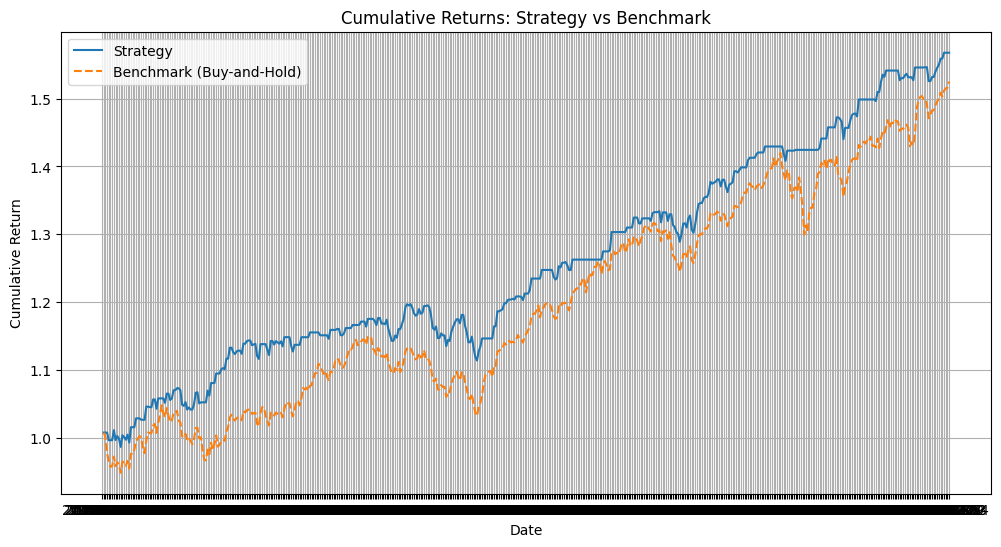

In [212]:
import matplotlib.pyplot as plt

# Run profitability analysis
profitability_results = calculate_profitability(backtest_results, financial_data)

# Plot cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(profitability_results['Date'], profitability_results['Cumulative_Strategy_Return'], label='Strategy', linestyle='-', marker=None)
plt.plot(profitability_results['Date'], profitability_results['Cumulative_Benchmark_Return'], label='Benchmark (Buy-and-Hold)', linestyle='--', marker=None)
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Cumulative Returns: Strategy vs Benchmark')
plt.legend()
plt.grid()
plt.show()


Total Return:

In [201]:
strategy_return = profitability_results['Cumulative_Strategy_Return'].iloc[-1] - 1
benchmark_return = profitability_results['Cumulative_Benchmark_Return'].iloc[-1] - 1
print(f"Total Strategy Return: {strategy_return:.2%}")
print(f"Total Benchmark Return: {benchmark_return:.2%}")


Total Strategy Return: 56.79%
Total Benchmark Return: 52.52%


In [214]:
import numpy as np

strategy_sharpe = (profitability_results['Strategy_Return'].mean() / profitability_results['Strategy_Return'].std()) * np.sqrt(252)
benchmark_sharpe = (profitability_results['Benchmark_Return'].mean() / profitability_results['Benchmark_Return'].std()) * np.sqrt(252)

print(f"Strategy Sharpe Ratio: {strategy_sharpe:.2f}")
print(f"Benchmark Sharpe Ratio: {benchmark_sharpe:.2f}")


Strategy Sharpe Ratio: 2.41
Benchmark Sharpe Ratio: 1.72


In [216]:
def calculate_max_drawdown(cumulative_returns):
    peak = cumulative_returns.cummax()
    drawdown = (cumulative_returns - peak) / peak
    max_drawdown = drawdown.min()
    return max_drawdown

strategy_max_drawdown = calculate_max_drawdown(profitability_results['Cumulative_Strategy_Return'])
benchmark_max_drawdown = calculate_max_drawdown(profitability_results['Cumulative_Benchmark_Return'])

print(f"Strategy Max Drawdown: {strategy_max_drawdown:.2%}")
print(f"Benchmark Max Drawdown: {benchmark_max_drawdown:.2%}")


Strategy Max Drawdown: -6.96%
Benchmark Max Drawdown: -10.28%
